<a href="https://colab.research.google.com/github/Sreeyanaidu/-Loan-Eligibility-Prediction/blob/main/Loan_eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Loan Eligibility for Dream Housing Finance**

**Importing essential libraries for numerical computing, data manipulation, and visualization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **DATA UNDERSTANDING**

**Shows DataFrame summary**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Returns the column labels of the DataFrame**

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Returns the number of unique values in the "Loan_ID" column.**

In [ ]:
data["Loan_ID"].nunique()

614

**Drop unimportant columns as per feature selection (Filter methods)**

In [ ]:
data.drop(columns=["Loan_ID"],inplace=True)

In [ ]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
data["Gender"].value_counts()

,count
Gender,
Male,489
Female,112


In [ ]:
data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data["Married"].value_counts()

,count
Married,
Yes,398
No,213


In [ ]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
data["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
data["Education"].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [ ]:
data["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data["Self_Employed"].value_counts()

,count
Self_Employed,
No,500
Yes,82


**Create new columns as per requirements**

In [ ]:
data["Income"]=data["ApplicantIncome"] + data["CoapplicantIncome"]

data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [ ]:
data["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
data["Loan_Amount_Term"].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [ ]:
data["Credit_History"].unique()

array([ 1.,  0., nan])

In [ ]:
data["Credit_History"].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [ ]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
data["Property_Area"].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [ ]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
data["Loan_Status"].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
continuous = ['Income','LoanAmount']

discrete_categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

discrete_count =  ['Dependents','Loan_Amount_Term']

In [ ]:
data.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Property_Area,object
Loan_Status,object


# **EXPLORATORY DATA ANALYSIS (EDA)**

**For continuous variables**

In [ ]:
data[continuous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


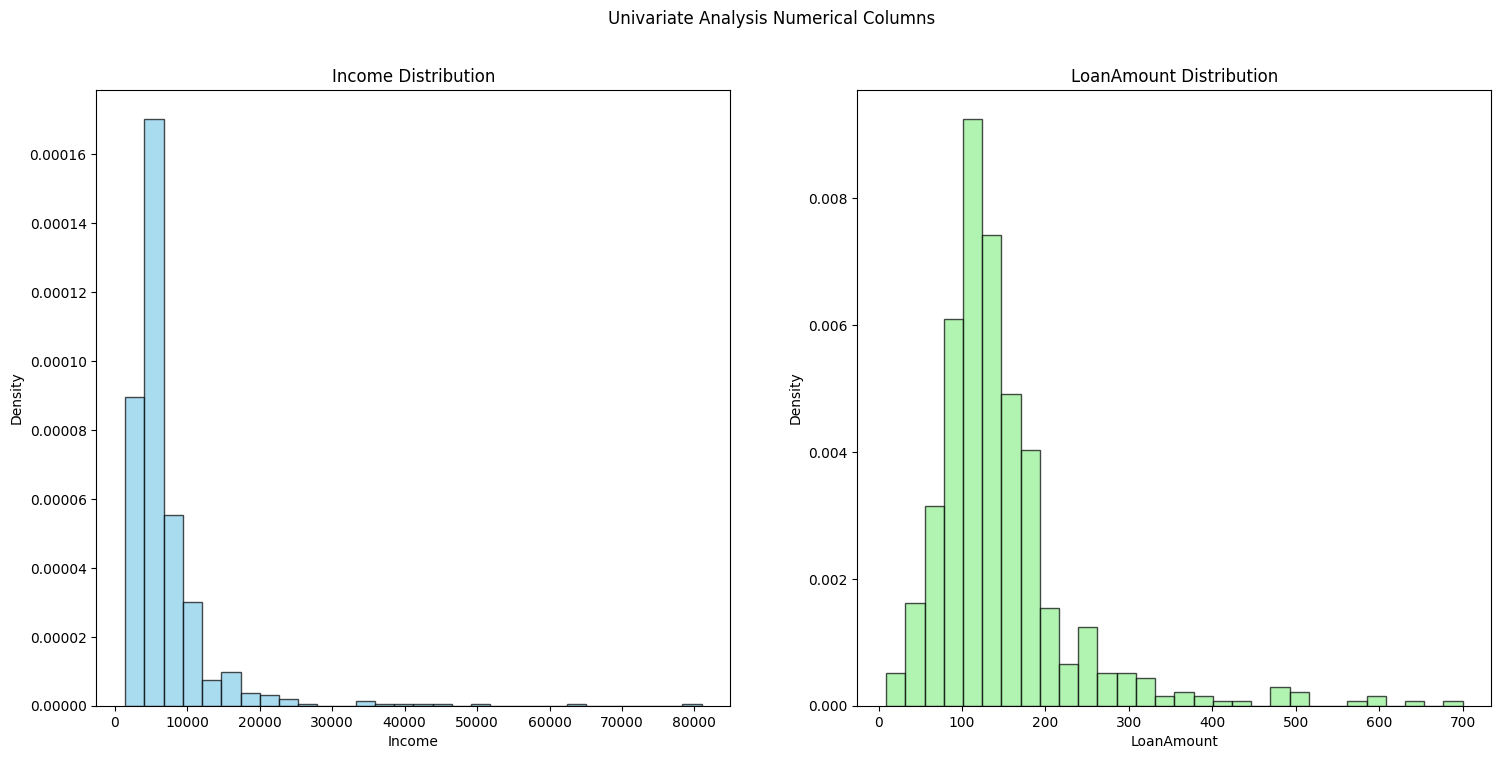

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8)

# First subplot for 'Income'
plt.subplot(1, 2, 1)
plt.hist(data['Income'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)  # Histogram
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Density')

# Second subplot for 'LoanAmount'
plt.subplot(1, 2, 2)
plt.hist(data['LoanAmount'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7, density=True)  # Histogram
plt.title('LoanAmount Distribution')
plt.xlabel('LoanAmount')
plt.ylabel('Density')

# Main title for the whole plot
plt.suptitle('Univariate Analysis Numerical Columns')
plt.show()

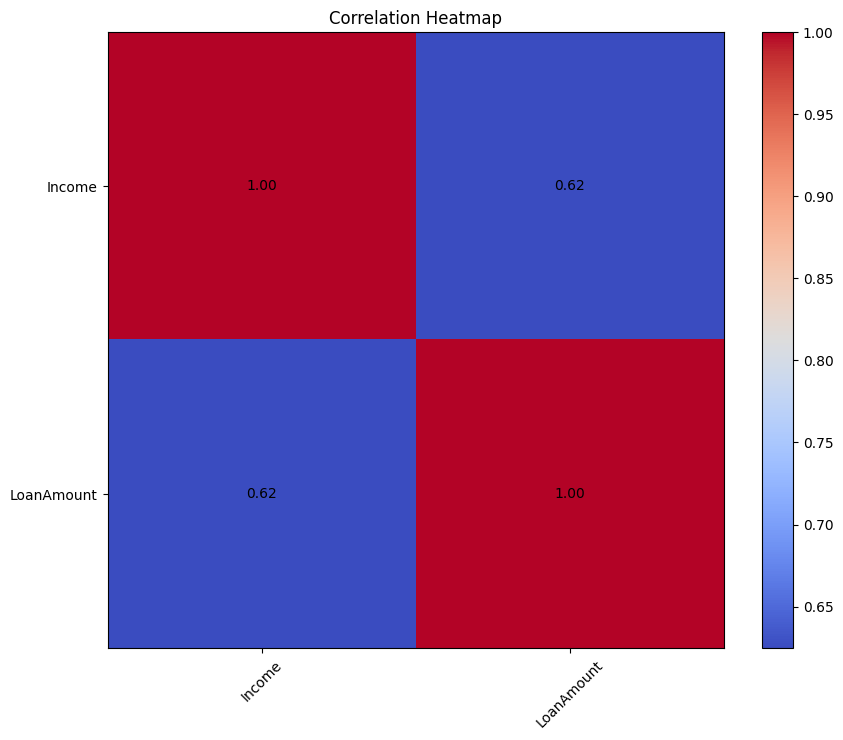

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)

# Compute correlation matrix
corr = data[continuous].corr()

# Create a heatmap using imshow()
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Add annotations
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Set axis labels and ticks
plt.xticks(ticks=range(len(corr)), labels=corr.columns, rotation=45)
plt.yticks(ticks=range(len(corr)), labels=corr.columns)

# Title
plt.title('Correlation Heatmap')

plt.show()

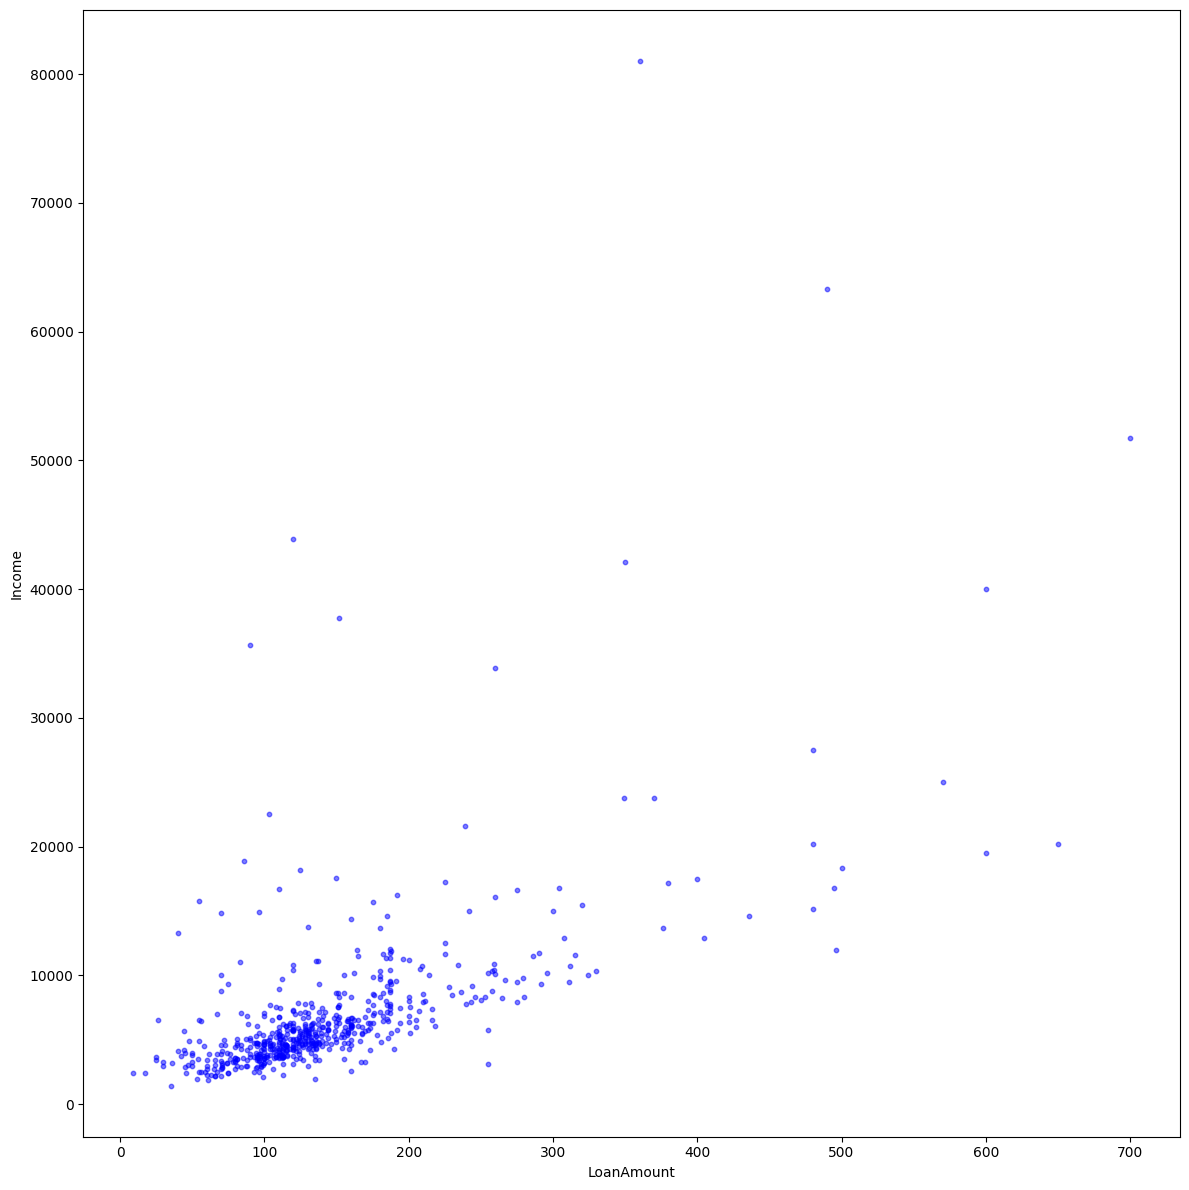

In [ ]:
# Set up the figure size
plt.figure(figsize=(12, 12))

# Get the number of continuous variables
n = len(continuous)

# Create subplots for each pair of variables
plot_num = 1
for i in range(n):
    for j in range(i + 1, n):
        plt.subplot(n - 1, n - 1, plot_num)
        plt.scatter(data[continuous[j]], data[continuous[i]], alpha=0.5, s=10, color='blue')
        plt.xlabel(continuous[j])
        plt.ylabel(continuous[i])
        plot_num += 1

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**For discrete variables**

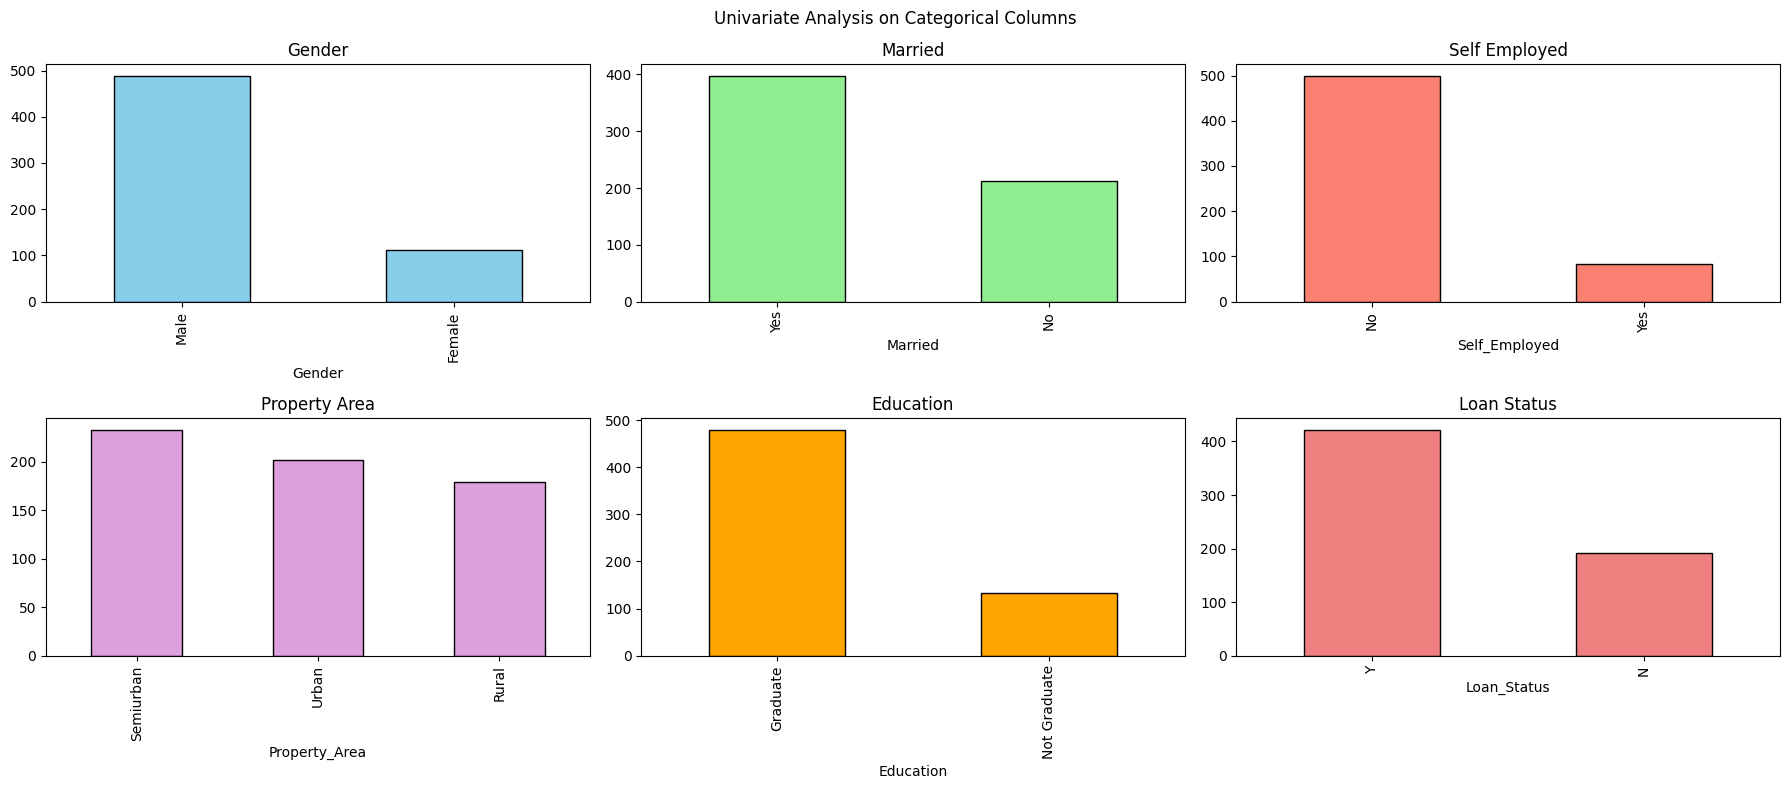

In [ ]:
plt.figure(figsize=(18, 8))

# Gender
plt.subplot(2, 3, 1)
data['Gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender')

# Married
plt.subplot(2, 3, 2)
data['Married'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Married')

# Self_Employed
plt.subplot(2, 3, 3)
data['Self_Employed'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Self Employed')

# Property_Area
plt.subplot(2, 3, 4)
data['Property_Area'].value_counts().plot(kind='bar', color='plum', edgecolor='black')
plt.title('Property Area')

# Education
plt.subplot(2, 3, 5)
data['Education'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Education')

# Loan_Status
plt.subplot(2, 3, 6)
data['Loan_Status'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Loan Status')

# Title and show
plt.suptitle('Univariate Analysis on Categorical Columns')
plt.tight_layout()
plt.show()


**check for missing values**

In [ ]:
data.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50
Property_Area,0
Loan_Status,0


# **DATA PREPARATION**

**Wrong Data Treatment**

In [ ]:
data['Dependents'] = data['Dependents'].replace({'3+':3})

replaces '3+' with 3 in the Dependents column to convert it into a numerical format for easier processing in machine learning models.

**Missing Value Treatment**

In [ ]:
data['Dependents'] = data['Dependents'].fillna(0)

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data = data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

fills missing values in Dependents with 0, replaces missing values in Gender, Married, and Self_Employed with their mode (most frequent value), and drops rows where Income, LoanAmount, Loan_Amount_Term, or Credit_History are missing to ensure data completeness.

**Data Type Conversion**

In [ ]:
data['Dependents'] = data['Dependents'].astype(int)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype(int)


<ipython-input-40-613d24cd0bf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dependents'] = data['Dependents'].astype(int)
<ipython-input-40-613d24cd0bf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype(int)


converts the Dependents and Loan_Amount_Term columns to integers, ensuring they are in a numeric format for analysis and modeling.

**Encoding**

**Converting the categorical values in multiple columns to numerical representations for easier processing and analysis.**

In [ ]:
data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})
data['Married'] = data['Married'].replace({'Yes':1, 'No':0})
data['Education'] = data['Education'].replace({'Graduate':1, 'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1, 'No':0})
data['Property_Area'] = data['Property_Area'].replace({'Rural':0, 'Semiurban':1, 'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good':1, 'bad':0})
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1, 'N':0})


<ipython-input-41-66346fe36a14>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})
<ipython-input-41-66346fe36a14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})
<ipython-input-41-66346fe36a14>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [ ]:
# transformations
data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12

<ipython-input-42-dfd76b815d2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12


**Splitting the data into X(Target) and y(Features)**

In [ ]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

separates the dataset into features (X) by dropping the target column Loan_Status and assigns the target variable (y) to Loan_Status for model training.

**Train-Test-Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

--------------

# **MODELLING AND EVALUATION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


**1. Logistic Regression**

In [ ]:
# Modelling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict & Evaluate on train data
ypred_train = log_model.predict(X_train)  # default threshold value is 0.5
print("Train Accuracy :", accuracy_score(y_train, ypred_train))

# Cross Validation on Train data
print("CV Score :", cross_val_score(log_model, X_train, y_train, cv=5, scoring="accuracy").mean())

# Predict & Evaluation on test data
ypred_test = log_model.predict(X_test)
print("Test Accuracy :", accuracy_score(y_test, ypred_test))


# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))


Train Accuracy : 0.8132387706855791
CV Score : 0.7943417366946779
Test Accuracy : 0.8113207547169812
[[15 18]
 [ 2 71]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.80      0.97      0.88        73

    accuracy                           0.81       106
   macro avg       0.84      0.71      0.74       106
weighted avg       0.82      0.81      0.79       106



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**2. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=9)  # Choosing a default value for n_neighbors
knn_model.fit(X_train, y_train)

# Predict & Evaluate on train data
ypred_train = knn_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, ypred_train))

# Cross Validation on Train data
cv_score = cross_val_score(knn_model, X_train, y_train, cv=5, scoring="accuracy").mean()
print("CV Score:", cv_score)

# Predict & Evaluate on test data
ypred_test = knn_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.7186761229314421
CV Score: 0.6407282913165265
Test Accuracy: 0.6981132075471698


**3. Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# SVM model
svm_model = SVC(kernel='rbf', C=1)  # Using common default values
svm_model.fit(X_train, y_train)

# Predict & Evaluate on train data
ypred_train = svm_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, ypred_train))

# Cross Validation on Train data
cv_score = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="accuracy").mean()
print("CV Score:", cv_score)

# Predict & Evaluate on test data
ypred_test = svm_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, ypred_test))



Train Accuracy: 0.6950354609929078
CV Score: 0.6926610644257704
Test Accuracy: 0.6886792452830188


**Decision Tree Classifier**

In [ ]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

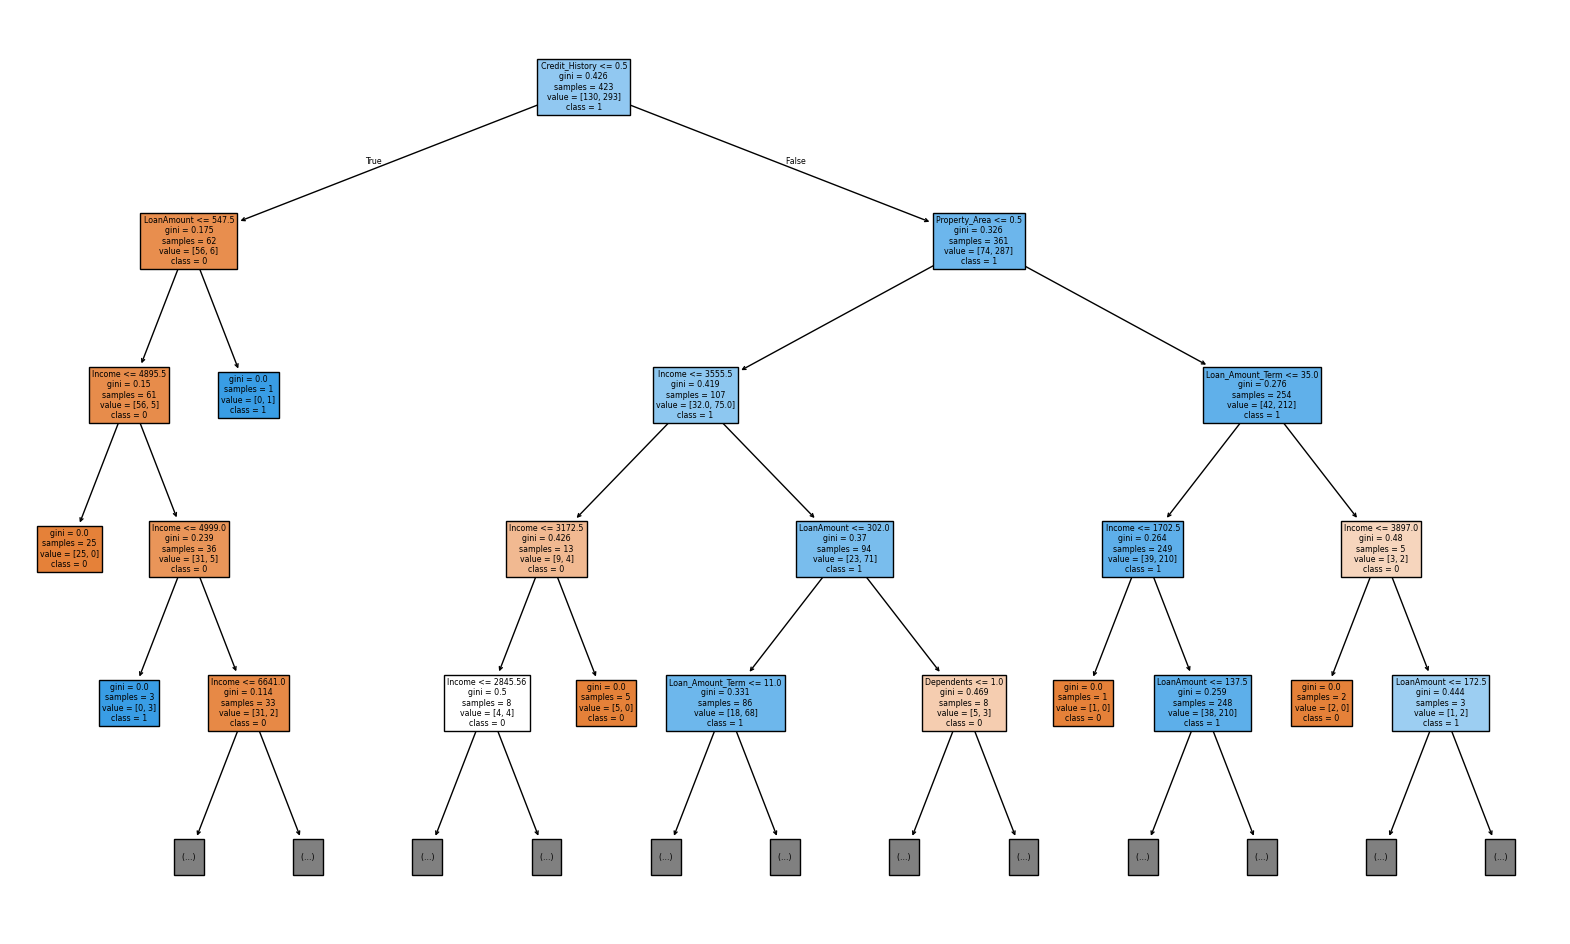

In [ ]:
from sklearn.tree import plot_tree

# Limit tree depth to reduce complexity
plt.figure(figsize=(20, 12), dpi=100)  # Larger size for better readability
plot_tree(model, filled=True,
          feature_names=X_train.columns.tolist(),
          class_names=["0", "1"],
          max_depth=4)  # Limit depth to control node count
plt.show()



In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Basic Decision Tree model
dt = DecisionTreeClassifier(random_state=42)  # Default parameters
dt.fit(X_train, y_train)

# Predict & Evaluate on train data
ypred_train = dt.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, ypred_train))

# Cross Validation on Train data
cv_score = cross_val_score(dt, X_train, y_train, cv=5, scoring="accuracy").mean()
print("CV Score:", cv_score)

# Predict & Evaluate on test data
ypred_test = dt.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, ypred_test))



Train Accuracy: 1.0
CV Score: 0.6999719887955183
Test Accuracy: 0.6792452830188679


**5. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Basic Random Forest model
rf = RandomForestClassifier(random_state=42)  # Default parameters
rf.fit(X_train, y_train)

# Predict & Evaluate on train data
ypred_train = rf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, ypred_train))

# Cross Validation on Train data
cv_score = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy").mean()
print("CV Score:", cv_score)

# Predict & Evaluate on test data
ypred_test = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 1.0
CV Score: 0.7731092436974789
Test Accuracy: 0.8018867924528302


**6. Adaboost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Basic AdaBoost model
ab = AdaBoostClassifier(random_state=42)  # Default parameters
ab.fit(X_train, y_train)

# Predict & Evaluate on train data
ypred_train = ab.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, ypred_train))

# Cross Validation on Train data
cv_score = cross_val_score(ab, X_train, y_train, cv=5, scoring="accuracy").mean()
print("CV Score:", cv_score)

# Predict & Evaluate on test data
ypred_test = ab.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, ypred_test))



Train Accuracy: 0.8108747044917257
CV Score: 0.8038375350140056
Test Accuracy: 0.8301886792452831


**7. Gradient Boost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Basic Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)  # Default parameters
gb.fit(X_train, y_train)

# Predict & Evaluate on train data
ypred_train = gb.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, ypred_train))

# Cross Validation on Train data
cv_score = cross_val_score(gb, X_train, y_train, cv=5, scoring="accuracy").mean()
print("CV Score:", cv_score)

# Predict & Evaluate on test data
ypred_test = gb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, ypred_test))



Train Accuracy: 0.9078014184397163
CV Score: 0.7636134453781512
Test Accuracy: 0.839622641509434


**8. XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Basic XGBoost model
xgb = XGBClassifier(random_state=42)  # Default parameters
xgb.fit(X_train, y_train)

# Predict & Evaluate on train data
ypred_train = xgb.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, ypred_train))

# Cross Validation on Train data
cv_score = cross_val_score(xgb, X_train, y_train, cv=5, scoring="accuracy").mean()
print("CV Score:", cv_score)

# Predict & Evaluate on test data
ypred_test = xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

Train Accuracy: 1.0
CV Score: 0.7328851540616246
Test Accuracy: 0.7830188679245284


**SAVE THE BEST MODEL**

**PREDICT ON NEW DATA**

In [ ]:
input_data = {
    "Loan_ID": "LP002991",
    "Gender": "Male",
    "Married": "Yes",
    "Dependents": 2,
    "Education": "Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 100,
    "CoapplicantIncome": 100,
    "LoanAmount": 1000000,
    "Loan_Amount_Term": 240,
    "Credit_History": "Bad",
    "Property_Area": "Urban"
}


In [ ]:
data = pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,Yes,2,Graduate,No,100,100,1000000,240,Bad,Urban


**Apply Data Preprocessing on Unknown data**

In [ ]:
data.drop(columns=["Loan_ID"], inplace=True)

data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

data['Dependents'] = data['Dependents'].fillna(0)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data = data.dropna(subset=['Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

data['Dependents'] = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes': 1, 'No': 0})
data['Property_Area'] = data['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Credit_History'] = data['Credit_History'].replace({'Good': 1, 'Bad': 0})
data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12

X_new = data


<ipython-input-58-5f887a4ccb64>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
<ipython-input-58-5f887a4ccb64>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0})
<ipython-input-58-5f887a4ccb64>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [ ]:
predictions = xgb.predict(X_new)
print(predictions)


[0]
